## Group 87 Final report - Predicting Reason for Absence at Work

## Introduction

Background Information

Absenteeism is defined as the absence of people in work or temporary inability to work. People miss work for various reasons, many times due to health-related issues like medical or dental consultation. This specific reason could vary depending on variables like an employee’s age or body mass index (BMI). In this project, we aim to predict the reason for absence using a classification model based on three predictors: age, BMI and absenteeism time in hours.

Dataset Information

The dataset, with 740 rows and 21 columns, is obtained from the UCI Machine Learning Repository. It was collected from July 2007 to July 2010 at a courier company in Brazil. A total of 28 reasons for absences are documented, each represented by an integer from 1 to 28. A reason represented by 0 means “other reason”. The top 10 reasons are selected to be predicted as many reasons like death and blood donation are less common in the dataset.

# Methods and Results 

#### Describe in written English the methods you used to perform your analysis from beginning to end that narrates the code the does the analysis.

## Preliminary Data Analysis 

## Loading the dataset and the necessary libraries:

In [1]:
library(tidyverse)
library(tidymodels)
library(cowplot)
install.packages("themis")
library(themis)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

## Data Table showing number of observations in each Reason of Absence:

In [2]:
data <- read_csv2(url("https://raw.githubusercontent.com/tim13246879/dsci-100-2022w1-group-87/main/Absenteeism_at_work.csv"))
colnames(data) <- make.names(colnames(data))

data_selected <- select(data,Reason.for.absence,Absenteeism.time.in.hours,Body.mass.index,Son) |>
        mutate(across(Reason.for.absence, as.factor))
data_selected

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 740 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (20): ID, Reason for absence, Month of absence, Day of the week, Seasons...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Reason.for.absence,Absenteeism.time.in.hours,Body.mass.index,Son
<fct>,<dbl>,<dbl>,<dbl>
26,4,30,2
0,0,31,1
23,2,31,0
7,4,24,2
23,2,30,2
23,2,31,0
22,8,27,1
23,4,23,4
19,40,25,2


We now made graphs of the mean of each predictor variable against the reasons of absence. This was just to make sure that there was a correlation between our predictors and the variable we're classifying. We will not use the mean in our final prediction.

In [3]:
data_table <- data_selected |>
    group_by(Reason.for.absence)|>
    summarize(n=n()) |>
    filter(Reason.for.absence != "0") |>
    arrange(desc(n)) |>
    slice(1:10)
data_table

data <- filter(data, Reason.for.absence %in% c("23","28","27","13","19","22","26","25","11","10"))
data

Reason.for.absence,n
<fct>,<int>
23,149
28,112
27,69
13,55
19,40
22,38
26,33
25,31
11,26


ID,Reason.for.absence,Month.of.absence,Day.of.the.week,Seasons,Transportation.expense,Distance.from.Residence.to.Work,Service.time,Age,Work.load.Average.day,⋯,Disciplinary.failure,Education,Son,Social.drinker,Social.smoker,Pet,Weight,Height,Body.mass.index,Absenteeism.time.in.hours
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11,26,7,3,1,289,36,13,33,239554,⋯,0,1,2,1,0,1,90,172,30,4
3,23,7,4,1,179,51,18,38,239554,⋯,0,1,0,1,0,0,89,170,31,2
11,23,7,5,1,289,36,13,33,239554,⋯,0,1,2,1,0,1,90,172,30,2
3,23,7,6,1,179,51,18,38,239554,⋯,0,1,0,1,0,0,89,170,31,2
10,22,7,6,1,361,52,3,28,239554,⋯,0,1,1,1,0,4,80,172,27,8
20,23,7,6,1,260,50,11,36,239554,⋯,0,1,4,1,0,0,65,168,23,4
14,19,7,2,1,155,12,14,34,239554,⋯,0,1,2,1,0,0,95,196,25,40
1,22,7,2,1,235,11,14,37,239554,⋯,0,3,1,0,0,1,88,172,29,8
20,11,7,4,1,260,50,11,36,239554,⋯,0,1,4,1,0,0,65,168,23,8


Reason.for.absence,Absenteeism.time.in.hours,Reason
<fct>,<dbl>,<chr>
10,11.040000,Diseases of the respiratory system
11,11.423077,Diseases of the digestive system
13,15.309091,Diseases of the musculoskeletal system and connective tissue
19,18.225000,"Injury, poisoning and certain other consequences of external causes"
22,7.710526,patient follow-up
23,2.845638,medical consultation
25,3.483871,laboratory examination
26,7.272727,unjustified absence
27,2.275362,physiotherapy


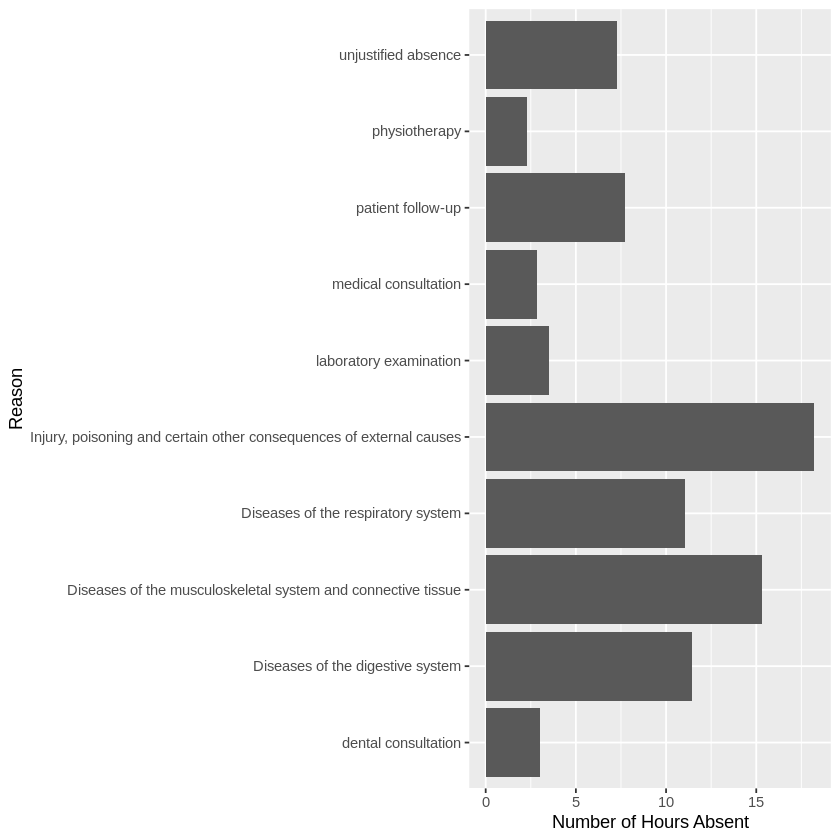

In [4]:
data_mean_time <- select(data,Reason.for.absence,Absenteeism.time.in.hours) |>
        mutate(across(Reason.for.absence, as.factor))  |>
    group_by(Reason.for.absence)|>
    summarize(Absenteeism.time.in.hours = mean(Absenteeism.time.in.hours))|>
    mutate(Reason= c("Diseases of the respiratory system","Diseases of the digestive system",
                     "Diseases of the musculoskeletal system and connective tissue", 
                     "Injury, poisoning and certain other consequences of external causes",
                     "patient follow-up", "medical consultation", "laboratory examination",
                     "unjustified absence", "physiotherapy", "dental consultation"))
data_mean_time

data_plot_time <- ggplot(data_mean_time, aes(y=Reason,x=Absenteeism.time.in.hours)) +
    geom_bar(stat = "identity", position = "dodge")+
    labs(x="Number of Hours Absent")
data_plot_time

# Data table for BMI:
### BMI on x-axis and reason for missing work on y-axis

Reason.for.absence,Body.mass.index,Reason
<fct>,<dbl>,<chr>
10,26.20000,Diseases of the respiratory system
11,26.42308,Diseases of the digestive system
13,26.63636,Diseases of the musculoskeletal system and connective tissue
19,26.40000,"Injury, poisoning and certain other consequences of external causes"
22,26.18421,patient follow-up
23,26.65772,medical consultation
25,25.09677,laboratory examination
26,30.18182,unjustified absence
27,27.46377,physiotherapy


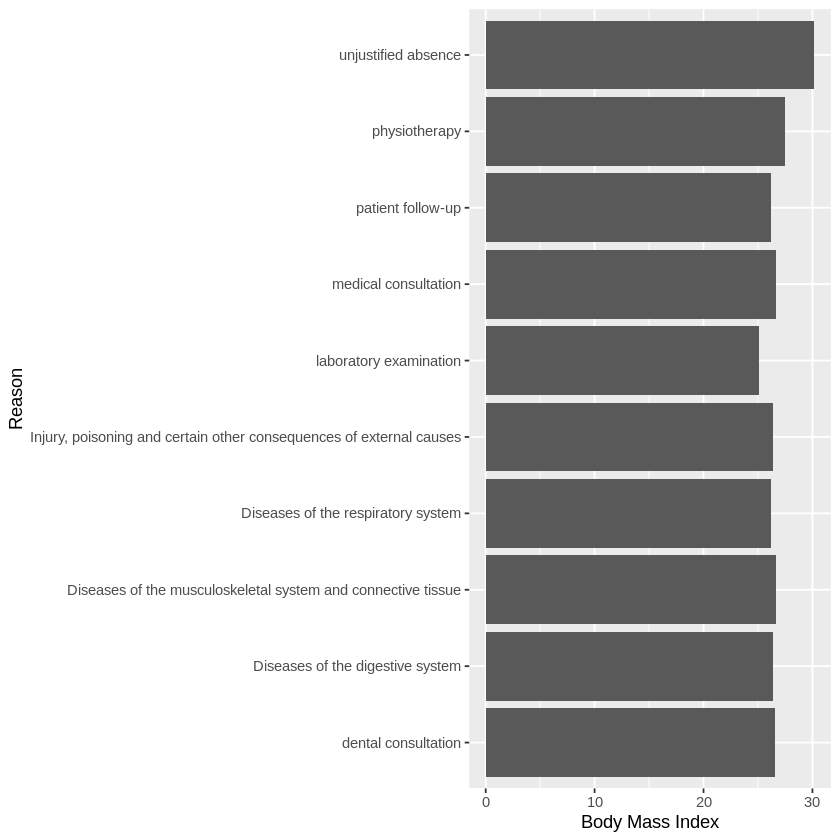

In [5]:
data_mean_BMI <- select(data,Reason.for.absence,Body.mass.index) |>
        mutate(across(Reason.for.absence, as.factor))  |>
    group_by(Reason.for.absence)|>
    summarize(Body.mass.index = mean(Body.mass.index)) |>
    mutate(Reason= c("Diseases of the respiratory system","Diseases of the digestive system",
                     "Diseases of the musculoskeletal system and connective tissue", 
                     "Injury, poisoning and certain other consequences of external causes",
                     "patient follow-up", "medical consultation", "laboratory examination",
                     "unjustified absence", "physiotherapy", "dental consultation"))
data_mean_BMI 

data_plot_BMI <- ggplot(data_mean_BMI, aes(y=Reason,x=Body.mass.index)) +
    geom_bar(stat = "identity", position = "dodge")+
    labs(x="Body Mass Index")
data_plot_BMI

# Data plot for Age:
### Age on x-axis and reason for missing work on y-axis

Reason.for.absence,Age,Reason
<fct>,<dbl>,<chr>
10,35.96000,Diseases of the respiratory system
11,35.11538,Diseases of the digestive system
13,36.49091,Diseases of the musculoskeletal system and connective tissue
19,35.45000,"Injury, poisoning and certain other consequences of external causes"
22,32.65789,patient follow-up
23,35.61074,medical consultation
25,36.16129,laboratory examination
26,37.84848,unjustified absence
27,35.50725,physiotherapy


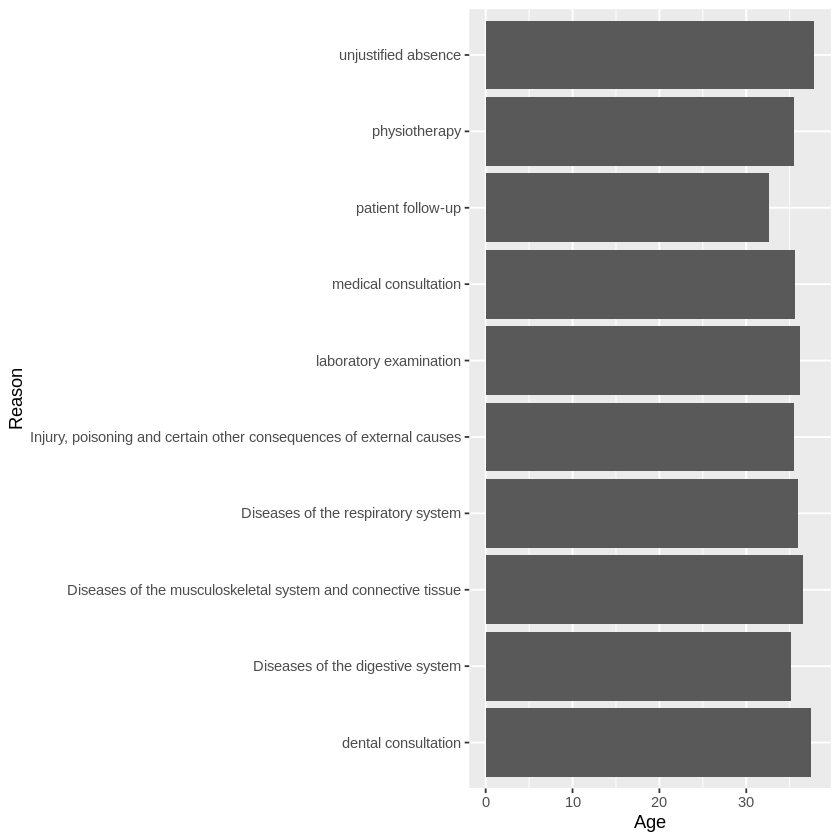

In [6]:
data_mean_Age <- select(data,Reason.for.absence,Age) |>
        mutate(across(Reason.for.absence, as.factor))  |>
    group_by(Reason.for.absence)|>
    summarize(Age = mean(Age)) |>
    mutate(Reason= c("Diseases of the respiratory system","Diseases of the digestive system",
                     "Diseases of the musculoskeletal system and connective tissue", 
                     "Injury, poisoning and certain other consequences of external causes",
                     "patient follow-up", "medical consultation", "laboratory examination",
                     "unjustified absence", "physiotherapy", "dental consultation"))
data_mean_Age

data_plot_Age <- ggplot(data_mean_Age, aes(y=Reason,x=Age)) +
    geom_bar(stat = "identity", position = "dodge")
data_plot_Age

# Data plot for Children:
### Number of children on x-axis and reason for missing work on y-axis

Reason.for.absence,Son,Reason
<fct>,<dbl>,<chr>
10,1.00000000,Diseases of the respiratory system
11,0.65384615,Diseases of the digestive system
13,0.90909091,Diseases of the musculoskeletal system and connective tissue
19,1.45000000,"Injury, poisoning and certain other consequences of external causes"
22,1.60526316,patient follow-up
23,0.95302013,medical consultation
25,1.06451613,laboratory examination
26,1.45454545,unjustified absence
27,0.05797101,physiotherapy


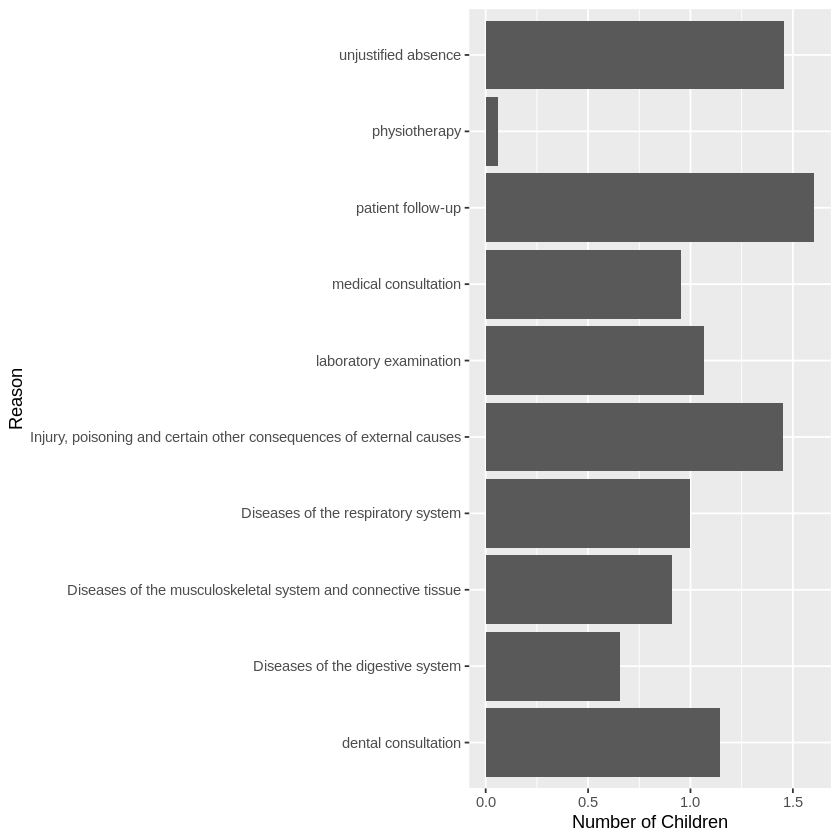

In [7]:
data_mean_children <- select(data,Reason.for.absence,Son) |>
        mutate(across(Reason.for.absence, as.factor))  |>
    group_by(Reason.for.absence)|>
    summarize(Son = mean(Son)) |>
    mutate(Reason= c("Diseases of the respiratory system","Diseases of the digestive system",
                     "Diseases of the musculoskeletal system and connective tissue", 
                     "Injury, poisoning and certain other consequences of external causes",
                     "patient follow-up", "medical consultation", "laboratory examination",
                     "unjustified absence", "physiotherapy", "dental consultation"))
data_mean_children 

data_plot_children <- ggplot(data_mean_children, aes(y=Reason,x=Son)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(x="Number of Children")
data_plot_children

The graphs above show the strength of the correlation between the predictor variables and the Reason of Absenteeism. The number of children and the number of hours absent are stronger predictors than age or BMI, therefore we will use these two predictors for the remaining data analysis.

## Data analysis 

We will perform our data analysis using a classification model. We select Body Mass Index, Age, and absenteeism time in hours as our predictor variables. We first mutate the "Reason for absence" column in our dataset to factor. 

In [8]:
data <- mutate(data, Reason.for.absence = as_factor(Reason.for.absence))
data


ID,Reason.for.absence,Month.of.absence,Day.of.the.week,Seasons,Transportation.expense,Distance.from.Residence.to.Work,Service.time,Age,Work.load.Average.day,⋯,Disciplinary.failure,Education,Son,Social.drinker,Social.smoker,Pet,Weight,Height,Body.mass.index,Absenteeism.time.in.hours
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11,26,7,3,1,289,36,13,33,239554,⋯,0,1,2,1,0,1,90,172,30,4
3,23,7,4,1,179,51,18,38,239554,⋯,0,1,0,1,0,0,89,170,31,2
11,23,7,5,1,289,36,13,33,239554,⋯,0,1,2,1,0,1,90,172,30,2
3,23,7,6,1,179,51,18,38,239554,⋯,0,1,0,1,0,0,89,170,31,2
10,22,7,6,1,361,52,3,28,239554,⋯,0,1,1,1,0,4,80,172,27,8
20,23,7,6,1,260,50,11,36,239554,⋯,0,1,4,1,0,0,65,168,23,4
14,19,7,2,1,155,12,14,34,239554,⋯,0,1,2,1,0,0,95,196,25,40
1,22,7,2,1,235,11,14,37,239554,⋯,0,3,1,0,0,1,88,172,29,8
20,11,7,4,1,260,50,11,36,239554,⋯,0,1,4,1,0,0,65,168,23,8


We set our seed to 1. Then we split the dataset into 70% training set and 30% training set. Then we perform a 5-fold cross validation using the vfold_cv function to split up the training data. Next, we create a recipe that specifies the reasons for absence and predictors, as well as preprocessing steps for all predictor variables.

In [9]:
set.seed(1) 

data_split <- initial_split(data, prop = 0.7, strata = Reason.for.absence)  
data_train <- training(data_split)
data_test <- testing(data_split)

data_recipe <- recipe(Reason.for.absence ~ Son, data = data_train) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors()) 
data_recipe

data_vfold <- vfold_cv(data_train, v = 5, strata = Reason.for.absence)

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          1

Operations:

Scaling for all_predictors()
Centering for all_predictors()

Then we create a nearest_neighbors model specification, with neighbors = tune(). 

In [10]:
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")
knn_tune

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


We then add the recipe and model specification to a workflow(), and use the tune_grid function on the train/validation splits to estimate the classifier accuracy for a range of K values from 1 to 50. We made a plot that compares the accuracies with k. 

Note than k_vals is chosen to be 1 to 100 so it is less computationally expensive. We also tried k_vals of 1 to 100, and it took way too long to process.

In [11]:
k_vals <- tibble(neighbors = seq(1:50))

knn_results <- workflow() |>
    add_recipe(data_recipe) |>
    add_model(knn_tune) |>
    tune_grid(resamples = data_vfold, grid = k_vals) |>
    collect_metrics()
knn_results 

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.2406354,5,0.030888674,Preprocessor1_Model01
1,roc_auc,hand_till,0.5102352,5,0.011268564,Preprocessor1_Model01
2,accuracy,multiclass,0.2381354,5,0.031052848,Preprocessor1_Model02
2,roc_auc,hand_till,0.5118413,5,0.009630318,Preprocessor1_Model02
3,accuracy,multiclass,0.2456963,5,0.026755376,Preprocessor1_Model03
3,roc_auc,hand_till,0.5199402,5,0.009312177,Preprocessor1_Model03
4,accuracy,multiclass,0.2654509,5,0.023541546,Preprocessor1_Model04
4,roc_auc,hand_till,0.5258266,5,0.012140745,Preprocessor1_Model04
5,accuracy,multiclass,0.2679201,5,0.022174099,Preprocessor1_Model05


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.2406354,5,0.03088867,Preprocessor1_Model01
2,accuracy,multiclass,0.2381354,5,0.03105285,Preprocessor1_Model02
3,accuracy,multiclass,0.2456963,5,0.02675538,Preprocessor1_Model03
4,accuracy,multiclass,0.2654509,5,0.02354155,Preprocessor1_Model04
5,accuracy,multiclass,0.2679201,5,0.02217410,Preprocessor1_Model05
6,accuracy,multiclass,0.2629810,5,0.02114048,Preprocessor1_Model06
7,accuracy,multiclass,0.2629810,5,0.02114048,Preprocessor1_Model07
8,accuracy,multiclass,0.2629810,5,0.02114048,Preprocessor1_Model08
9,accuracy,multiclass,0.2654201,5,0.02211540,Preprocessor1_Model09


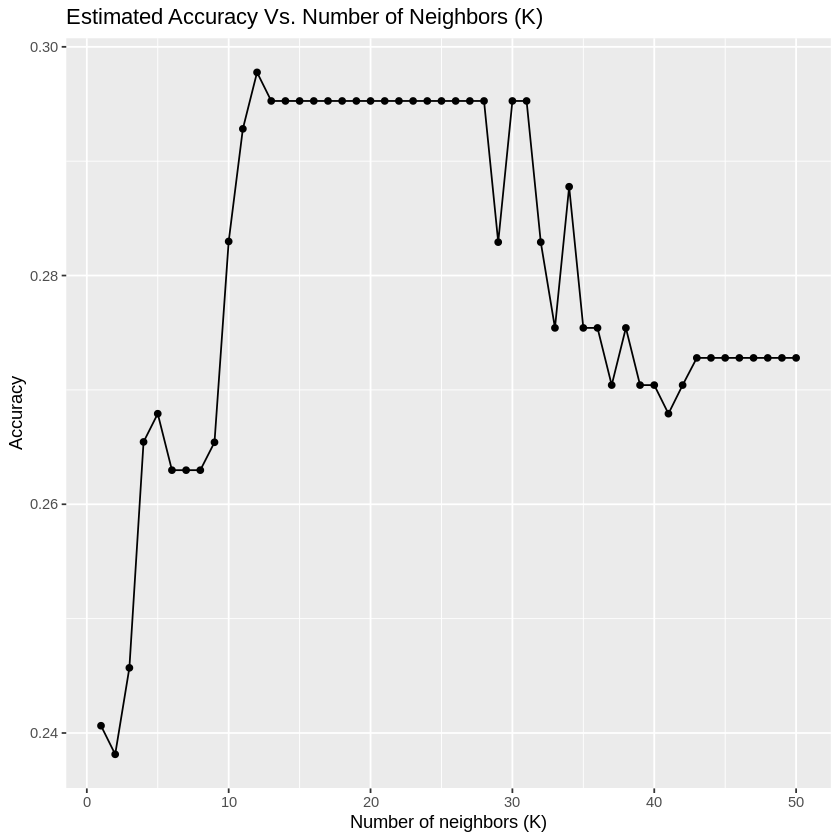

In [12]:
accuracies <- knn_results |>
    filter(.metric == "accuracy")
accuracies 


knn_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Number of neighbors (K)", y = "Accuracy", title = "Estimated Accuracy Vs. Number of Neighbors (K)")
knn_plot

From the above graph, it appears that K = 40 might be the best for the model. It has relatively high accurcacy at 0.30 compared to other values of K. Although higher accuracies exist at other values of K like K = 5 and K = 47, none of these accuracies are as consistent as K = 40. At K = 40, accuracies of nearby values (from K = 37 to K = 42) of K are consistent at around 0.30. Consistent accuracies around the chosen K is important as this means small fluctuations in the data won't impact the accuracy significantly. Also note that K = 40 is chosen instead of 39 as the drop in accuracy at K = 43 is less than the drop at K = 36, both of which are 3 away from 40 and 39. 

We then make a new model specification for the best parameter value (i.e., K = 40), and retrain the entire data set using the fit function. 

In [13]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 40) |>
            set_engine("kknn") |>
            set_mode("classification")

data_fit <- workflow() |>
             add_recipe(data_recipe) |>
             add_model(knn_spec) |>
             fit(data = data_train)
data_fit


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(40,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.7022333
Best kernel: rectangular
Best k: 40

Then we evaluate the estimated accuracy of the classifier based on the testing data. We also evaluate the confusion matrix. 

In [14]:
data_test_predictions <- predict(data_fit, data_test) |>
                          bind_cols(data_test)
data_test_predictions

data_prediction_accuracy <- data_test_predictions |>
                        metrics(truth = Reason.for.absence, estimate = .pred_class)
data_prediction_accuracy

data_mat <- data_test_predictions |>
                conf_mat(truth = Reason.for.absence, estimate = .pred_class)
data_mat

.pred_class,ID,Reason.for.absence,Month.of.absence,Day.of.the.week,Seasons,Transportation.expense,Distance.from.Residence.to.Work,Service.time,Age,⋯,Disciplinary.failure,Education,Son,Social.drinker,Social.smoker,Pet,Weight,Height,Body.mass.index,Absenteeism.time.in.hours
<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
28,20,11,7,4,1,260,50,11,36,⋯,0,1,4,1,0,0,65,168,23,8
23,3,23,7,6,1,179,51,18,38,⋯,0,1,0,1,0,0,89,170,31,2
23,33,23,8,4,1,248,25,14,47,⋯,0,1,2,0,0,1,86,165,32,2
23,10,13,8,2,1,361,52,3,28,⋯,0,1,1,1,0,4,80,172,27,40
28,20,28,8,6,1,260,50,11,36,⋯,0,1,4,1,0,0,65,168,23,4
23,11,23,8,3,1,289,36,13,33,⋯,0,1,2,1,0,1,90,172,30,1
23,19,11,8,5,1,291,50,12,32,⋯,0,1,0,1,0,0,65,169,23,4
23,34,23,9,2,1,118,10,10,37,⋯,0,1,0,0,0,0,83,172,28,4
23,14,23,9,4,1,155,12,14,34,⋯,0,1,2,1,0,0,95,196,25,2


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.25714286
kap,multiclass,0.04672114


          Truth
Prediction 10 11 13 19 22 23 25 26 27 28
        10  0  0  0  0  0  0  0  0  0  0
        11  0  0  0  0  0  0  0  0  0  0
        13  0  0  0  0  0  0  0  0  0  0
        19  0  0  0  0  0  0  0  0  0  0
        22  0  0  0  0  0  0  0  0  0  0
        23  6 10 20 13  8 39 10  8 20 28
        25  0  0  0  0  0  0  0  0  0  0
        26  0  0  0  0  0  0  0  0  0  0
        27  0  0  0  0  0  0  0  0  0  0
        28  0  1  2  3  0  0  0  1  0  6

## Discussion 

### What we find: 
### discuss whether this is what you expected to find?
### discuss what impact could such findings have?
- Such finding could help employers understand the reasons for their employee's absence at work, assisting them in planning and hiring processes

### discuss what future questions could this lead to?
- If such classifier is accurate, one question that could be asked is how and why each predictor is related to the reason of absence. And whether this classifier can be used on a wider population (in Brazil, or in other places of the world).

# Reference 

Martiniano, A., Ferreira, R. P., Sassi, R. J., & Affonso, C. (2012). Application of a neuro fuzzy network in prediction of absenteeism at work. In Information Systems and Technologies (CISTI), 7th Iberian Conference on (pp. 1-4). IEEE.